In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Attention, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define paths
data_dir_train = "/kaggle/input/iris-data/Retinal fundus images for DR/1.train"
data_dir_val = "/kaggle/input/iris-data/Retinal fundus images for DR/2.val"

# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Data generators for training and validation# Define paths
data_dir_train = "/kaggle/input/iris-data/Retinal fundus images for DR/1.train"
data_dir_val = "/kaggle/input/iris-data/Retinal fundus images for DR/2.val"

# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Data augmentation for training data
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen_val.flow_from_directory(
    data_dir_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load VGG19 Model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
attention_input = Dense(512, activation='relu')(x)
attention_scores = Dense(512, activation='softmax')(attention_input)
x = tf.keras.layers.multiply([x, attention_scores])

# Add custom layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile model
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
start_time = time.time()
history = model.fit(train_generator, validation_data=val_generator, epochs=20)
training_time = time.time() - start_time


Found 638 images belonging to 7 classes.
Found 136 images belonging to 7 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.1993 - loss: 1.9455 - val_accuracy: 0.2059 - val_loss: 1.9440
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2132 - loss: 1.9438 - val_accuracy: 0.2794 - val_loss: 1.9419
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2030 - loss: 1.9415 - val_accuracy: 0.1912 - val_loss: 1.9380
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2087 - loss: 1.9380 - val_accuracy: 0.1912 - val_loss: 1.9191
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1949 - loss: 1.9078 - val_accuracy: 0.1912 - val_loss: 1.8952
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1848 - loss: 1.9124 - val_accuracy: 0.1912 - val_loss: 1.8898
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1952 - loss: 1.8984 - val_accuracy: 0.1912 - val_loss: 1.8830
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1833 - loss: 1.9087 - val_accuracy: 0.1912 - val_loss: 1.8760
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


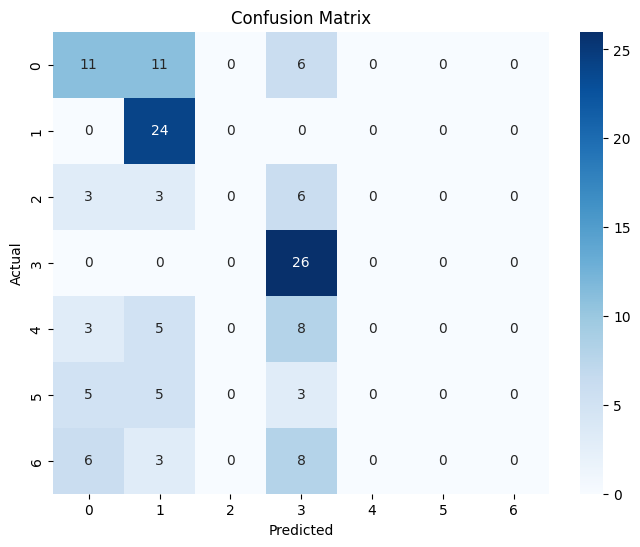

Class: 1. No DR signs
  Precision: 0.3929
  Recall: 0.3929
  F1 Score: 0.3929

Class: 2. Mild (or early) NPDR
  Precision: 0.4706
  Recall: 1.0000
  F1 Score: 0.6400

Class: 3. Moderate NPDR
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Class: 4. Severe NPDR
  Precision: 0.4561
  Recall: 1.0000
  F1 Score: 0.6265

Class: 5. Very Severe NPDR
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Class: 6. PDR
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Class: 7. Advanced PDR
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Training Time: 725.22 seconds
Learning Rate: 0.0001
Accuracy: 0.4485
Precision: 0.2511
Recall: 0.4485
Specificity: 0.0000
F1 Score: 0.3136


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
# Evaluate model
y_true = []
y_pred = []

for i in range(len(val_generator)):
    images, labels = val_generator[i]
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys(), output_dict=True)

# Extract evaluation metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
specificity = report['0']['recall'] if '0' in report else 0  # Specificity as recall for class 0
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Print class-wise classification report
for class_name, class_metrics in report.items():
    if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class: {class_name}")
        print(f"  Precision: {class_metrics['precision']:.4f}")
        print(f"  Recall: {class_metrics['recall']:.4f}")
        print(f"  F1 Score: {class_metrics['f1-score']:.4f}\n")

# Print overall evaluation metrics
print(f"Training Time: {training_time:.2f} seconds")
print(f"Learning Rate: {learning_rate}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")


implementation with an attention mechanism

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Attention, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# Define paths
data_dir_train = "/kaggle/input/iris-data/Retinal fundus images for DR/1.train"
data_dir_val = "/kaggle/input/iris-data/Retinal fundus images for DR/2.val"

# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Data generators for training and validation
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen_val.flow_from_directory(
    data_dir_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load VGG19 Model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
attention_input = Dense(512, activation='relu')(x)
attention_scores = Dense(512, activation='softmax')(attention_input)
x = tf.keras.layers.multiply([x, attention_scores])

# Add custom layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile model
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
start_time = time.time()
history = model.fit(train_generator, validation_data=val_generator, epochs=10)
training_time = time.time() - start_time

# Save model
model.save("vgg19_attention_retinopathy.h5")

Found 638 images belonging to 7 classes.
Found 136 images belonging to 7 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1674 - loss: 1.9455 - val_accuracy: 0.2059 - val_loss: 1.9441
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1925 - loss: 1.9434 - val_accuracy: 0.2059 - val_loss: 1.9418
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1848 - loss: 1.9419 - val_accuracy: 0.2059 - val_loss: 1.9383
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1863 - loss: 1.9363 - val_accuracy: 0.2059 - val_loss: 1.9247
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.2106 - loss: 1.9115

In [ ]:
# Evaluate model
y_true = []
y_pred = []

for i in range(len(val_generator)):
    images, labels = val_generator[i]
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys(), output_dict=True)

# Extract evaluation metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
specificity = report['0']['recall'] if '0' in report else 0  # Specificity as recall for class 0
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Print class-wise classification report
for class_name, class_metrics in report.items():
    if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class: {class_name}")
        print(f"  Precision: {class_metrics['precision']:.4f}")
        print(f"  Recall: {class_metrics['recall']:.4f}")
        print(f"  F1 Score: {class_metrics['f1-score']:.4f}\n")

# Print overall evaluation metrics
print(f"Training Time: {training_time:.2f} seconds")
print(f"Learning Rate: {learning_rate}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")